In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Model

In [11]:
import tensorflow as tf

cnn = tf.keras.models.load_model('/content/trained_model.h5')


In [12]:
def load_nutritional_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [13]:
# Load nutritional data
nutritional_data_df = load_nutritional_data('/content/drive/MyDrive/nutrition app/food_items_nutrition.csv')

Prediction on Single Image

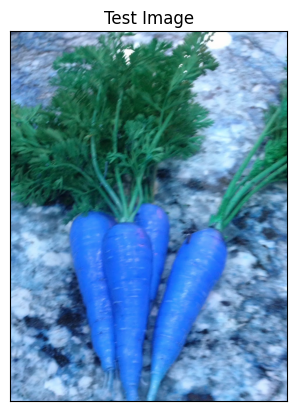

In [14]:
#visualization and performing predictions on single image
import cv2
image_path = '/content/drive/MyDrive/nutrition app/test/carrot/Image_7.JPG'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [15]:
#testing model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


In [16]:
print(predictions[0])
print(max(predictions[0]))

[7.17915245e-04 6.88019739e-08 2.45148991e-03 9.06959249e-05
 1.59701557e-07 9.00385421e-05 9.79100943e-01 6.42357705e-08
 7.34480782e-05 8.38163214e-06 6.40632507e-08 1.38947689e-06
 7.90584920e-07 6.62687671e-06 2.32395996e-06 1.08865579e-05
 1.82601138e-06 1.70956491e-06 1.06554445e-07 9.40361224e-06
 3.77642456e-04 5.17487386e-03 4.38677031e-04 2.98023115e-05
 5.82172932e-09 9.66758747e-03 1.07421780e-04 1.36230199e-04
 3.07073875e-04 1.88689194e-06 3.54762375e-09 2.30930345e-06
 5.79616113e-04 4.99728485e-04 2.42480619e-05 8.47500341e-05]
0.97910094


In [17]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/nutrition app/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [18]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [19]:
result_index = np.where(predictions[0] == max(predictions[0]))
predicted_label = test_set.class_names[result_index[0][0]]
print(result_index[0][0])

6


In [20]:
#single prediction
print('It is a',format(test_set.class_names[result_index[0][0]]))

It is a carrot


In [21]:
file = open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+"\n")
file.close()

In [22]:
with open("labels.txt") as f:
  content = f.readlines()

In [23]:
# Function to retrieve nutritional value
def get_nutritional_value(predicted_name, nutritional_data_df):
    # Match the predicted name with the 'item' column
    result = nutritional_data_df[nutritional_data_df['item'].str.lower() == predicted_name.lower()]
    if not result.empty:
        # Extract all nutritional details
        calories = result['calories(g)'].values[0]
        protein = result['protein(g)'].values[0]
        carbs = result['carbs(g)'].values[0]
        fat = result['fat(g)'].values[0]
        tip = result['tip'].values[0]

        return f"\nCalories: {calories}g\n Protein: {protein}g\n Carbs: {carbs}g\n Fat: {fat}g\n Tip: {tip}\n"
    else:
        return "Nutritional information not found"


In [24]:
# Retrieve and print the nutritional information
nutritional_info = get_nutritional_value(predicted_label, nutritional_data_df)
print('It is a',format(test_set.class_names[result_index[0][0]]))
print(f'Nutritional Information: {nutritional_info}')


It is a carrot
Nutritional Information: 
Calories: 41g
 Protein: 0.9g
 Carbs: 10.0g
 Fat: 0.2g
 Tip: Boosts eye health and immunity.



In [25]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']

In [26]:
# Save the variable to a file
with open('image_path.txt', 'w') as f:
    f.write(image_path)